# SI figure 2

In [1]:
# import general packages
import numpy as np
import os
import dill as pickle
pickle.settings['recurse'] = True

# Matplotlib
from matplotlib import pyplot as plt
from matplotlib import cm
from matplotlib.gridspec import GridSpec

# Import functions
%matplotlib inline

# Plotting params

In [4]:
axes_color =  '0.8'

plt.rcParams.update({'font.size': 7,
                     'font.family': 'sans-serif',
                     'font.sans-serif' : 'Helvetica',
                     'font.style':'normal',
                     'axes.grid' : False,
                     'axes.edgecolor': axes_color,
                     'ytick.color': '.15',
                     'xtick.color':'.15',
                     'lines.linewidth':1,
                    })

ytick_major_size = 3.5
plt.rcParams['ytick.major.size'] = ytick_major_size
plt.rcParams['ytick.major.width'] = 0.8

xtick_major_size = 3.5
plt.rcParams['xtick.major.size'] = xtick_major_size
plt.rcParams['xtick.major.width'] = 0.8
plt.rcParams['lines.markersize'] = 2.5

plt.rcParams['errorbar.capsize'] = 1.5
plt.rcParams['lines.markeredgewidth'] = 0.5


linewidth_default = plt.rcParams['lines.linewidth']
markersize_default = plt.rcParams['lines.markersize']
elinewidht_default = plt.rcParams['lines.markeredgewidth']
capsize_default = plt.rcParams['errorbar.capsize']
markeredgewidth_default = plt.rcParams['lines.markeredgewidth']


# Define the analytical functions to be plotted

In [2]:
def Fid(N_ent):
    sigma2 = N_ent
    return 1./2*(1+np.exp(-1./2*sigma2))

def Fid_1spec(g, N_ent):
    sigma2 = N_ent
    nu = np.exp(2*g*sigma2)
    mu = np.exp(g**2 * sigma2)
    rho = 4 + (nu-1)**2/(nu*mu)
    Fidelity = 1./2 + 1./4*np.exp(-1./2*sigma2)*np.sqrt(rho)   
    return Fidelity

def rho_exp(g, sigma):
    sigma2 = sigma**2
    nu = np.exp(2*g*sigma2)
    mu = np.exp(g**2 * sigma2)
    return (nu-1)**2/(nu*mu)*np.exp(-sigma2)

# Generate the figure

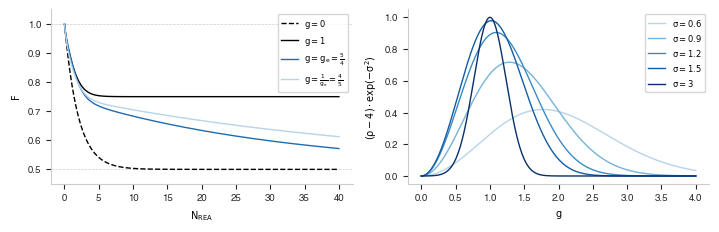

In [5]:
# Define the figure, gridspec and sub-gridspec. From these gridspecs, define the plot axes.
fig_multiplier = 1
fig = plt.figure(figsize = [18.3/2.54*1*fig_multiplier,8.9/2.54/1.5*fig_multiplier]) # ,constrained_layout=True)

gs = GridSpec(1, 2, figure=fig)#, hspace = 0.1, wspace = 0.1)
ax1 = fig.add_subplot(gs[0,0])
ax2 = fig.add_subplot(gs[0,1])

N_ent_points = 1000
g0 = 1
g1 = 5./4
g2 = 4./5
g_colors = cm.Blues(np.linspace(0.3,1,4))

N_ent = np.linspace(0,40,N_ent_points)
F_noSpec = Fid(N_ent)
F0 = Fid_1spec(g0, N_ent)
F1 = Fid_1spec(g1, N_ent)
F2 = Fid_1spec(g2, N_ent)


ax1.plot(N_ent, F_noSpec, label = r'$\mathrm{g=0}$', color = 'k', linewidth = linewidth_default*fig_multiplier, linestyle = '--')
ax1.plot(N_ent, F0, label = r'$\mathrm{g=1}$', color = 'k', linewidth = linewidth_default*fig_multiplier)
ax1.plot(N_ent, F1, label = r'$\mathrm{g=g_e=\frac{5}{4}}$', color = g_colors[2], linewidth = linewidth_default*fig_multiplier)
ax1.plot(N_ent, F2, label = r'$\mathrm{g=\frac{1}{g_e} = \frac{4}{5}}$', color = g_colors[0], linewidth = linewidth_default*fig_multiplier)

ax1.axhline(y = 0.5, color = 'k', alpha = 0.2, linewidth = 0.5*fig_multiplier, linestyle = '--')
ax1.axhline(y = 1.0, color = 'k', alpha = 0.2, linewidth = 0.5*fig_multiplier, linestyle = '--')

ax1.set_ylim([0.45,1.05])
ax1.set_xlabel(r'$\mathrm{ N_{REA} } $')
ax1.set_ylabel(r'$\mathrm{F}$')
ax1.legend(fontsize = 6)

ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)



g_points = 1000
g_arr = np.linspace(0,4,g_points)
sigma0 = 0.6
sigma1 = 0.9
sigma2 = 1.2
sigma3 = 1.5
sigma4 = 3
sigma_colors = cm.Blues(np.linspace(0.3,1,5))

rho_exp0 = rho_exp(g_arr, sigma0)
rho_exp1 = rho_exp(g_arr, sigma1)
rho_exp2 = rho_exp(g_arr, sigma2)
rho_exp3 = rho_exp(g_arr, sigma3)
rho_exp4 = rho_exp(g_arr, sigma4)


ax2.plot(g_arr, rho_exp0, label = r'$\mathrm{\sigma=0.6}$', color = sigma_colors[0], linewidth = linewidth_default*fig_multiplier)
ax2.plot(g_arr, rho_exp1, label = r'$\mathrm{\sigma=0.9}$', color = sigma_colors[1], linewidth = linewidth_default*fig_multiplier)
ax2.plot(g_arr, rho_exp2, label = r'$\mathrm{\sigma=1.2}$', color = sigma_colors[2], linewidth = linewidth_default*fig_multiplier)
ax2.plot(g_arr, rho_exp3, label = r'$\mathrm{\sigma=1.5}$', color = sigma_colors[3], linewidth = linewidth_default*fig_multiplier)
ax2.plot(g_arr, rho_exp4, label = r'$\mathrm{\sigma=3}$', color = sigma_colors[4], linewidth = linewidth_default*fig_multiplier)

ax2.set_xlabel(r'$\mathrm{ g } $')
ax2.set_ylabel(r'$\mathrm{ (\rho - 4) \cdot \exp(-\sigma^2)}$')
ax2.legend(fontsize = 6)

ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)


plt.tight_layout()

# FolderPath = r'...' 
# FigName = 'SI_Fig2.pdf'
# FigSavePath = os.path.join(FolderPath,FigName)

# plt.savefig(FigSavePath, bbox_inches='tight')# , transparent=True)
